In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [7]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

# 1 

In [8]:
def calc_logloss(y, y_pred):
    err = - np.mean([ y[k] * np.log(i) + (1.0 - y[k]) * np.log(1.0 - i)
                    if 0<i<1 else 0
                    for k,i in enumerate(y_pred)])
    # err = - y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred)
    return err

In [9]:
np.log(1)

0.0

In [10]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0.1])
calc_logloss(y1, y_pred1)

0.164252033486018

In [11]:
# Плохой пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.2])
calc_logloss(y1, y_pred1)

0.11157177565710485

In [12]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [13]:
z = np.linspace(-10, 10, 101)

In [14]:
probabilities = sigmoid(z)

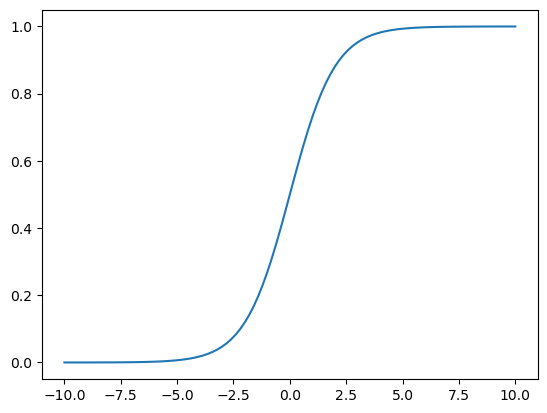

In [15]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [16]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        # print(y_pred,y)
# ПОДБОР КОЭФФИЦИЕНТОВ С УЧЕТОМ ЛОГЛОССА
        dQ = calc_logloss(y,y_pred)
        W -= eta * dQ
        # if i % (iterations / 10) == 0:
            # print(i, W, err)
            # print(logloss, W, sep='\t')
    return W,dQ

# запуск функции, вывод коэффициента и логлосса
W,logloss = eval_model(X_st, y, iterations=500, eta=1e-4)
print(W,logloss)

[ 0.44116524 -0.19381321  0.59213963  1.46748095] 1.0468863958026755


# 3

In [17]:
def calc_pred_proba(X, W):
    y_pred = sigmoid(np.dot(X, W))
    return y_pred
y_pred = calc_pred_proba(X_st, W)
y_pred

array([0.75671979, 0.79883233, 0.93783246, 0.61813574, 0.96690575,
       0.84487299, 0.98918186, 0.98458943, 0.74530387, 0.95342647])

# 4 

In [18]:
def calc_pred(y,y_pred):
    tpr = len(np.argwhere(y==1))
    tpr_ = len(np.argwhere(y==1))
    fpr = len(np.argwhere(y==0))
    fpr_ = len(np.argwhere(y==0))
    for step in np.linspace(0,1,11):
        y_pred_ = [1 if i>step else 0 for i in y_pred]
        y_array = np.array([y,y_pred_]).T
        tpr_ = len(np.argwhere((y_array[:,0] == 1) & (y_array[:,1]==1)))
        fpr_ = len(np.argwhere((y_array[:,0] == 0) & (y_array[:,1]==1)))
        if fpr-tpr<tpr_-fpr_:
            y_res = y_pred_.copy()
            print(y_res)

    return np.array(y_res)

y_res = calc_pred(y,y_pred)
y_res

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1]
[0, 0, 1, 0, 1, 0, 1, 1, 0, 1]


array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

# 5

In [19]:
accuracy = sum(y==y_res)/len(y)
accuracy

recall_1 = sum([1 if i==1 and i==ii else 0 for i,ii in zip(y,y_res)])/sum(y==1)
recall_0 = sum([1 if i==0 and i==ii else 0 for i,ii in zip(y,y_res)])/sum(y==0)
precision_1 = sum([1 if ii==1 and i==ii else 0 for i,ii in zip(y,y_res)])/sum(y_res==1)
precision_0 = sum([1 if ii==0 and i==ii else 0 for i,ii in zip(y,y_res)])/sum(y_res==0)
print('\n','accuracy =', accuracy,'\n',\
      'recall для 1 класса =', recall_1,'\n',\
      'recall для 0 класса =', recall_0,'\n',\
      'precision для 1 класса =', precision_1,'\n',\
      'precision для 0 класса =',precision_0,'\n',\
      sep = ' ')


 accuracy = 0.8 
 recall для 1 класса = 0.8 
 recall для 0 класса = 0.8 
 precision для 1 класса = 0.8 
 precision для 0 класса = 0.8 



In [20]:
TP = sum([1 if i==1 and i==ii else 0 for i,ii in zip(y,y_res)])
FN = sum([1 if i==1 and i!=ii else 0 for i,ii in zip(y,y_res)])
TN = sum([1 if i==0 and i==ii else 0 for i,ii in zip(y,y_res)])
FP = sum([1 if i==0 and i!=ii else 0 for i,ii in zip(y,y_res)])
recall = TP / (TP + FN)
precision = TP / (TP + FP)
print('\n','TP =', TP,'\n',\
      'FN =', FN,'\n',\
      'TN =', TN,'\n',\
      'FP =',FP,'\n',\
      'recall =',recall,'\n',\
      'precision =',precision,\
      sep = ' ')


 TP = 4 
 FN = 1 
 TN = 4 
 FP = 1 
 recall = 0.8 
 precision = 0.8
